# Content

- Part1. Sequence Modeling
- Part2. Dealing with text data
- Part3. Text generation practice




original reference :  
https://github.com/graykode/nlp-tutorial/

https://github.com/LeanManager/NLP-PyTorch

# Part1. Sequence Modeling

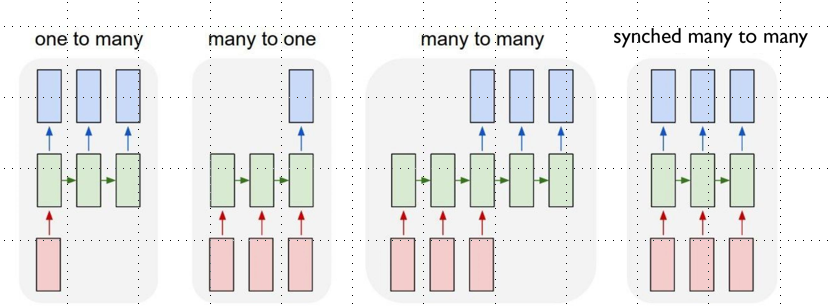

Additional Reference
https://karpathy.github.io/2015/05/21/rnn-effectiveness/

## Many to Many example - Hi Hello

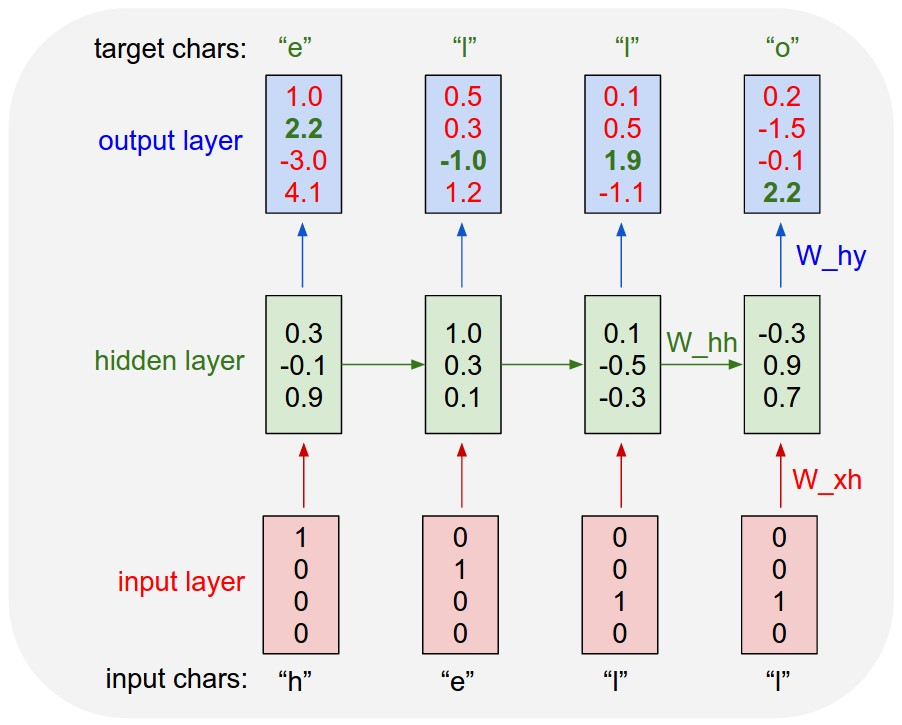

In [ ]:
import torch
import torch.optim as optim
import numpy as np
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)
# declare dictionary
char_set = ['h', 'i', 'e', 'l', 'o']
# hyper parameters
input_size = len(char_set)
hidden_size = len(char_set) * 2
output_size = len(char_set)
learning_rate = 0.1

In [ ]:
# data setting
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],  # h
              [0, 1, 0, 0, 0],  # i
              [1, 0, 0, 0, 0],  # h
              [0, 0, 1, 0, 0],  # e
              [0, 0, 0, 1, 0],  # l
              [0, 0, 0, 1, 0]]] # l
y_data = [[1, 0, 2, 3, 3, 4]] # i h e l l o
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [ ]:
import torch.nn.functional as F
ex_data = [0,1,0,2,3,3]
aaa = torch.FloatTensor(ex_data).to(torch.int64)
F.one_hot(aaa, num_classes=5)

tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]])

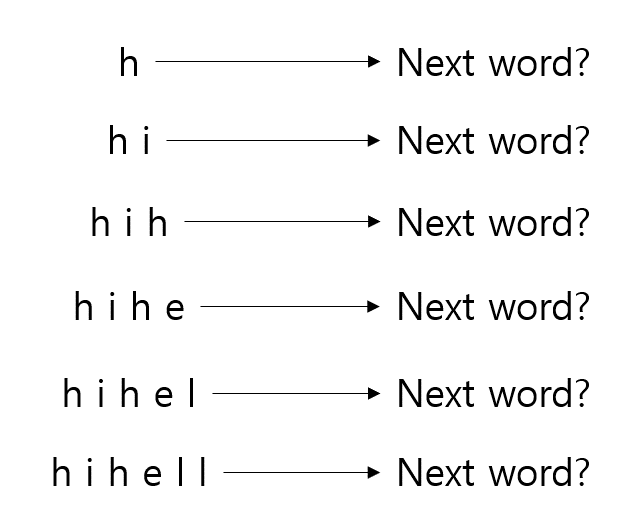

# --> Practice 1

1. SimpleRNN 클래스에 필요한 생성자를 정의하시오.
2. loss 를 정의하시오.




In [ ]:
# declare RNN

class simpleRNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(simpleRNN, self).__init__()
        self.rnn = 
        self.fc = 

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

rnn = simpleRNN(input_size, hidden_size, output_size)  # batch_first guarantees the order of output = (B, S, F)

# 2. loss 정의 (loss & optimizer setting)
criterion = 
optimizer = optim.Adam(rnn.parameters(), learning_rate)

In [ ]:
# start training
for i in range(10):
    optimizer.zero_grad()
    outputs = rnn(X)
    # print('out')
    # print(outputs.shape)
    # print(outputs.view(-1, input_size).shape)
    # print(Y.view(-1).shape)a
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.5919538736343384 prediction:  [[1 1 1 2 1 1]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  iiieii
1 loss:  1.3049103021621704 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  llllll
2 loss:  1.0239933729171753 prediction:  [[2 0 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ehelll
3 loss:  0.7200697064399719 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
4 loss:  0.47776028513908386 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
5 loss:  0.31055018305778503 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
6 loss:  0.20410068333148956 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
7 loss:  0.1369069516658783 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
8 loss:  0.08623168617486954 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihel

## Many to One example - Gender classification

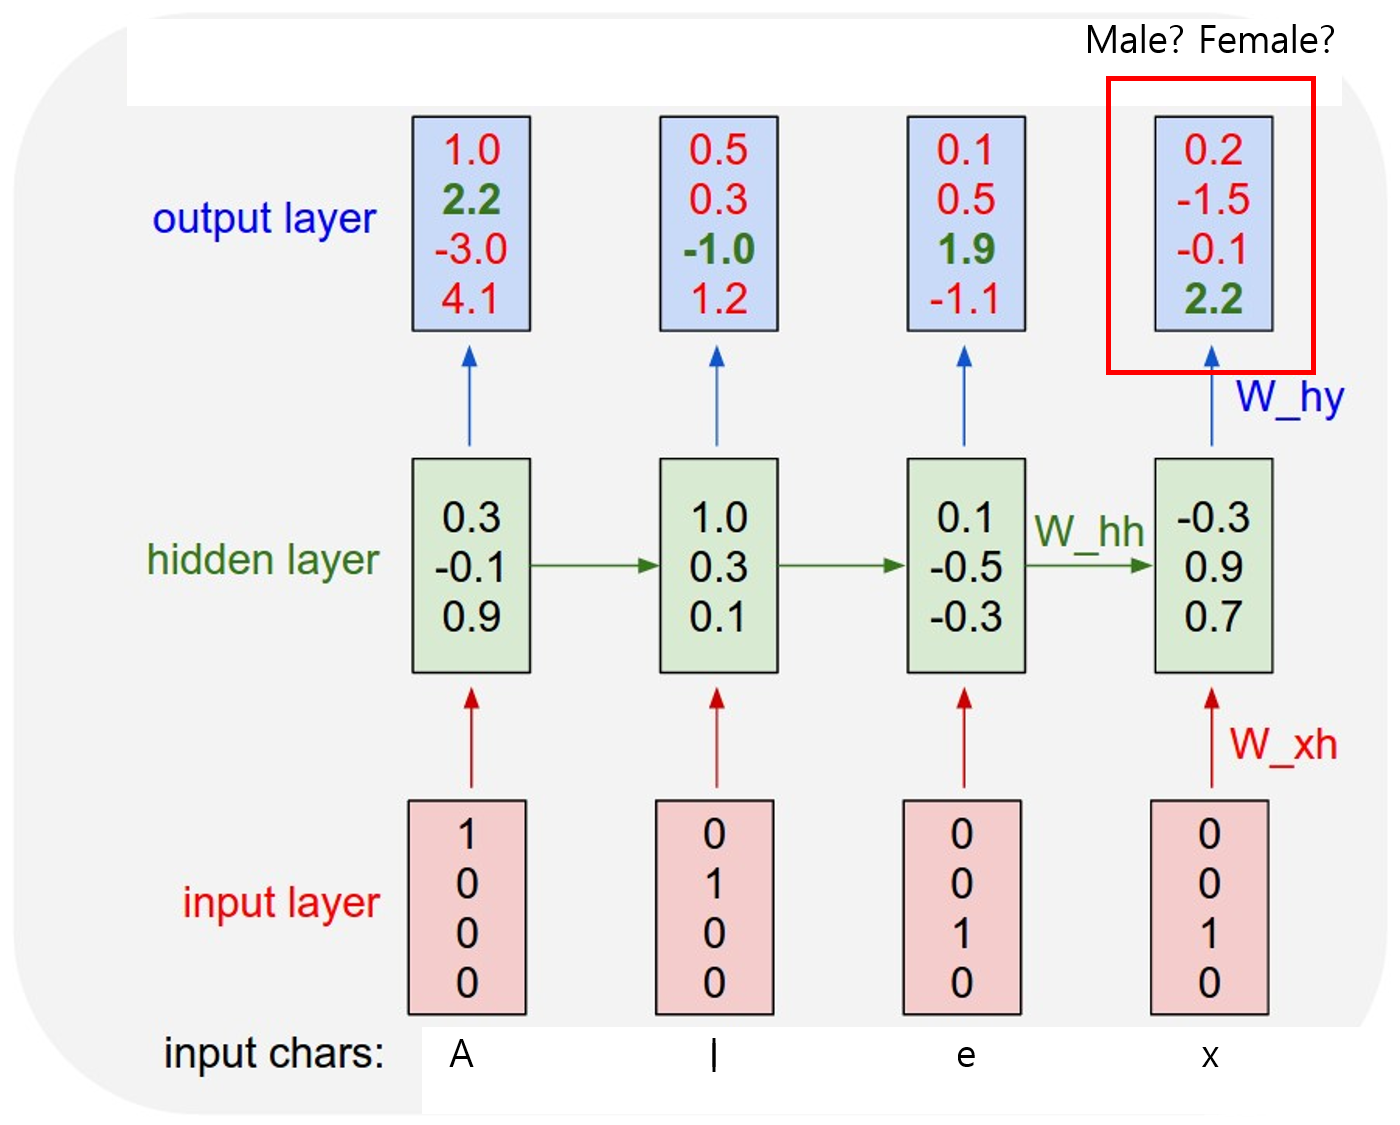

In [ ]:
import torch
import torch.optim as optim
import numpy as np
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)
# declare dictionary
char_set = ['a', 'd', 'e', 'h', 'i', 'n', 'o', 'p', 'r', 's', 'w']
# hyper parameters
input_size = len(char_set)
hidden_size = len(char_set) * 2
output_size =1
batch_size = 2
learning_rate = 0.1

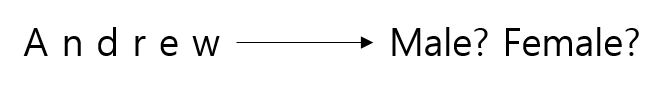

In [ ]:
# data setting
x_data = [[0, 5, 1, 8, 2, 10],  # andrew,
          [9, 6, 7, 3, 4, 0]]   # sophia
x_one_hot = [[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
             [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
             [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
            [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
             [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
             [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
y_data = [[0],  # Male
          [1]]  # Female
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.FloatTensor(y_data)

In [ ]:
X.shape

torch.Size([2, 6, 11])

In [ ]:
Y.shape

torch.Size([2, 1])

In [ ]:
# declare RNN

class simpleRNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(simpleRNN, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

rnn = simpleRNN(input_size, hidden_size, output_size)  # batch_first guarantees the order of output = (B, S, F)

In [ ]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

In [ ]:
# start training
for i in range(30):
    optimizer.zero_grad()
    outputs = rnn(X)
    loss = criterion(outputs[:, -1, :].squeeze(), Y.view(-1))
    loss.backward()
    optimizer.step()

    result = ["Male" if x < 0.5 else "Female" for x in outputs[:, -1, :].squeeze().tolist()]
    print(i, "loss: ", loss.item(),  "true Y: ", y_data, "prediction str: ", result)

0 loss:  0.5321497917175293 true Y:  [[0], [1]] prediction str:  ['Male', 'Male']
1 loss:  1.8379814624786377 true Y:  [[0], [1]] prediction str:  ['Female', 'Female']
2 loss:  0.8160942792892456 true Y:  [[0], [1]] prediction str:  ['Male', 'Male']
3 loss:  0.028033282607793808 true Y:  [[0], [1]] prediction str:  ['Male', 'Female']
4 loss:  0.5283945798873901 true Y:  [[0], [1]] prediction str:  ['Female', 'Female']
5 loss:  0.36983630061149597 true Y:  [[0], [1]] prediction str:  ['Male', 'Male']
6 loss:  0.06807628273963928 true Y:  [[0], [1]] prediction str:  ['Male', 'Female']
7 loss:  0.038168080151081085 true Y:  [[0], [1]] prediction str:  ['Male', 'Female']
8 loss:  0.05935906991362572 true Y:  [[0], [1]] prediction str:  ['Male', 'Female']
9 loss:  0.03677145391702652 true Y:  [[0], [1]] prediction str:  ['Male', 'Female']
10 loss:  0.013052789494395256 true Y:  [[0], [1]] prediction str:  ['Male', 'Female']
11 loss:  0.024364149197936058 true Y:  [[0], [1]] prediction str: 

# Part2. Dealing with Text Data

## Back to Character-level sequence modeling

### Build vocab dictionary 

In [ ]:
sentences = ["andrew", "sophia"] # 11 characters 

char_list = list(set([x for sent in sentences for x in list(sent)]))
char_list.sort()
char2idx = {w: i for i, w in enumerate(char_list)}
idx2char = {i: w for i, w in enumerate(char_list)}

In [ ]:
print(char_list)

['a', 'd', 'e', 'h', 'i', 'n', 'o', 'p', 'r', 's', 'w']


In [ ]:
char2idx

{'a': 0,
 'd': 1,
 'e': 2,
 'h': 3,
 'i': 4,
 'n': 5,
 'o': 6,
 'p': 7,
 'r': 8,
 's': 9,
 'w': 10}

### Setting problem

In [ ]:
n_class = len(char_list) # many to many

### Encode text to vector

In [ ]:
def make_batch():
    input_batch = []
    inputs = []
    for sent in sentences:
        input = [char2idx[n] for n in sent]  
        inputs.append(input)
        input_batch.append(np.eye(n_class, dtype=np.int8)[input].tolist())
    return inputs, input_batch

In [ ]:
inputs, input_batch = make_batch()

In [ ]:
input_batch

[[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]

In [ ]:
inputs

[[0, 5, 1, 8, 2, 10], [9, 6, 7, 3, 4, 0]]

## Expand it to word-level





In [ ]:
sentences = ["i like dog", "i love coffee", "i hate milk"]

### How to space - tokenize

In [ ]:
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word2idx = {w: i for i, w in enumerate(word_list)}
idx2word = {i: w for i, w in enumerate(word_list)}
n_class = len(word2idx)
batch_size = len(sentences)

### Embedding

In [ ]:
def make_batch(sentences):
    input_batch = []
    target_batch = []
    for sen in sentences:
        word = sen.split()  # space tokenizer
        input = [word2idx[n] for n in word[:-1]]  # create (1~n-1) as input
        target = word2idx[word[-1]]  # create (n) as target, We usually call this 'casual language model'
        input_batch.append(np.eye(n_class)[input])
        target_batch.append(target)

    return input_batch, target_batch

print(make_batch(sentences))

([array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.]]), array([[0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.]])], [2, 1, 4])


# Exercise2 & Part3. Text generation



In [ ]:
import numpy as np
import torch
from torch import nn
import os
import torch.nn.functional as F

## Preparation

In [ ]:
!wget https://raw.githubusercontent.com/LeanManager/NLP-PyTorch/master/data/anna.txt

--2022-09-05 10:43:20--  https://raw.githubusercontent.com/LeanManager/NLP-PyTorch/master/data/anna.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2025486 (1.9M) [text/plain]
Saving to: ‘anna.txt’

anna.txt            100%[===================>]   1.93M  --.-KB/s    in 0.06s   

2022-09-05 10:43:21 (34.8 MB/s) - ‘anna.txt’ saved [2025486/2025486]



In [ ]:
# open text file and read in data as `text`
with open('anna.txt', 'r') as f:
    text = f.read()

In [ ]:
len(text)

1985223

In [ ]:
print(text[:200])

Chapter 1


Happy families are all alike; every unhappy family is unhappy in its own
way.

Everything was in confusion in the Oblonskys' house. The wife had
discovered that the husband was carrying on


In [ ]:
char_list = list(set(text))
char_list.sort()

In [ ]:
len(char_list) #alphat + 숫자 + 특수기호 ..

83

In [ ]:
char2idx = {w: i for i, w in enumerate(char_list)}
idx2char = {i: w for i, w in enumerate(char_list)}

In [ ]:
encoded = torch.LongTensor([char2idx[ch] for ch in text])

## One-hot encoding

In [ ]:
def one_hot_encode(arr, n_labels):
    # Initialize the the encoded array
    one_hot = torch.zeros((np.multiply(arr.shape[0], arr.shape[1]), n_labels), dtype=torch.float32)
    # Fill the appropriate elements with ones
    one_hot[torch.arange(one_hot.shape[0]), arr.flatten().tolist()] = 1.    
    # Finally reshape it to get back to the original array
    one_hot = one_hot.reshape((arr.shape[0], arr.shape[1], n_labels))
    return one_hot

In [ ]:
encoded[:60].shape

torch.Size([60])

In [ ]:
ex = torch.stack((encoded[:30], encoded[30:60]), axis=0)
ex.shape

torch.Size([2, 30])

In [ ]:
one_hot_encode(ex, len(char_list))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
one_hot_encode(ex, len(char_list)).shape

torch.Size([2, 30, 83])

## Make batches

## --> Practice 2

1. arr 를 n_batches에 맞게끔 슬라이싱하시오.
  - Hint
    - len(encoded) : 1985223
    - full_batch_size * n_batches : 1985000

2. batch_size에 맞게끔 reshape하여 arr를 나타내시오.

3. text generation에 맞는 targets (y) 를 설정하시오.
  - Hint
    - IndexERROR 의 경우 참고

In [ ]:
def get_batches(arr, batch_size, seq_len):
    '''Create a generator that returns batches of size
       batch_size x seq_len from arr.
       
       Arguments
       ---------
       arr: Array you want to make batches from
       batch_size: Batch size, the number of sequences per batch
       seq_len: Number of sequence steps per batch
    '''
    
    full_batch_size = batch_size * seq_len
    n_batches = len(arr)//full_batch_size
    
    # practice 1. Keep only enough characters to make full batches by slicing
    arr = 
    # practice 2. Reshape into batch_size rows
    arr = 
    
    for n in range(0, arr.shape[1], seq_len):
        # The features
        x = arr[:, n:n+seq_len]
        # The targets, shifted by one
        y = torch.zeros_like(x, dtype=torch.long)
        
        try:
            # practice 3. targets setting for text generation
            y[:, :-1], y[:, -1] = 
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
        yield x, y

In [ ]:
batches = get_batches(encoded, 10, 50)
x, y = next(batches)

In [ ]:
x1, x2 = next(batches)

In [ ]:
x.shape, y.shape

(torch.Size([10, 50]), torch.Size([10, 50]))

In [ ]:
print('x\n', x[:10, :10])
print('\ny\n', y[:10, :10])

x
 tensor([[31, 64, 57, 72, 76, 61, 74,  1, 16,  0],
        [ 1, 57, 69,  1, 70, 71, 76,  1, 63, 71],
        [78, 65, 70, 13,  0,  0,  3, 53, 61, 75],
        [70,  1, 60, 77, 74, 65, 70, 63,  1, 64],
        [ 1, 65, 76,  1, 65, 75, 11,  1, 75, 65],
        [ 1, 37, 76,  1, 79, 57, 75,  0, 71, 70],
        [64, 61, 70,  1, 59, 71, 69, 61,  1, 62],
        [26,  1, 58, 77, 76,  1, 70, 71, 79,  1],
        [76,  1, 65, 75, 70,  7, 76, 13,  1, 48],
        [ 1, 75, 57, 65, 60,  1, 76, 71,  1, 64]])

y
 tensor([[64, 57, 72, 76, 61, 74,  1, 16,  0,  0],
        [57, 69,  1, 70, 71, 76,  1, 63, 71, 65],
        [65, 70, 13,  0,  0,  3, 53, 61, 75, 11],
        [ 1, 60, 77, 74, 65, 70, 63,  1, 64, 65],
        [65, 76,  1, 65, 75, 11,  1, 75, 65, 74],
        [37, 76,  1, 79, 57, 75,  0, 71, 70, 68],
        [61, 70,  1, 59, 71, 69, 61,  1, 62, 71],
        [ 1, 58, 77, 76,  1, 70, 71, 79,  1, 75],
        [ 1, 65, 75, 70,  7, 76, 13,  1, 48, 64],
        [75, 57, 65, 60,  1, 76, 71,  1, 6

## Model with PyTorch



In [ ]:
class CharRNN(nn.Module):
    
    def __init__(self, tokens, seq_len=100, hidden_size=256, n_layers=2, char_len=83,
                               drop_prob=0.5, lr=0.001):
        super(CharRNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size

        # 1. Create lstm. Note that our case, input and output should have as many numbers as the numbers of char_list. 
        self.lstm = nn.LSTM(char_len, hidden_size, n_layers, dropout=drop_prob, batch_first=True)
        # 2. Create output layer
        self.fc = nn.Linear(hidden_size, char_len)
      
    def forward(self, x, hc=None):
        ''' Forward pass through the network. 
            These inputs are x, and the hidden/cell state `hc`. '''
        
        # 3. Get x, and the new hidden state (h, c) from the lstm
        x, hc = self.lstm(x, hc)
        # 4. Stack up LSTM outputs using reshape
        x = x.reshape(x.size()[0]* x.size()[1], self.hidden_size)
        # 5. Put x through the fully-connected layer
        x = self.fc(x)
        # 6. Return x and the hidden state (h, c)
        return x, hc
        
    def init_hidden_cell(self, batch_size=128):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_size,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        return (weight.new(self.n_layers, batch_size, self.hidden_size).zero_(),
                weight.new(self.n_layers, batch_size, self.hidden_size).zero_())
        

In [ ]:
net = CharRNN(char_list, hidden_size=512, n_layers=2)
net

CharRNN(
  (lstm): LSTM(83, 512, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=512, out_features=83, bias=True)
)

## Training process

In [ ]:
def train(data, model, criterion, optimizer, saved_dir, device, 
          num_epochs=30, batch_size=128, seq_len=100, n_chars=83, val_every=100):
    print('Start training..')
    model.train()

    # create training and validation data
    val_frac = 0.1
    val_idx = int(len(data)*(1-val_frac))
    data, val_data = data[:val_idx], data[val_idx:]

    best_loss = 9999999
    step = 0
    for epoch in range(num_epochs):
        hc = model.init_hidden_cell(batch_size)
        
        for sequence, target in get_batches(data, batch_size, seq_len):
            step += 1

            # 1. create a one-hot encoding vector of sequence by function one_hot_encode
            sequence_onehot = one_hot_encode(sequence, n_chars)

            # 2. transform your target shape to be flattened
            target = target.reshape(batch_size * seq_len)

            # 3. pass it to gpu device
            sequence_onehot, target = sequence_onehot.to(device), target.to(device)

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            hc = tuple([each.data for each in hc])

            model.zero_grad()  # model and optimizer

            outputs, hc = model(sequence_onehot, hc)
            loss = criterion(outputs, target)

            loss.backward()  

            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)

            optimizer.step()  

            if step % val_every == 0:
                avg_loss = validation(val_data, model, criterion, device, seq_len, batch_size, n_chars)
                print("Epoch: {}/{}...".format(epoch+1, num_epochs),
                    "Step: {}...".format(step),
                    "Loss: {:.4f}...".format(loss.item()),
                    "Val Loss: {:.4f}".format(np.mean(avg_loss)))

                if avg_loss < best_loss:
                    print('Best performance at epoch: {}'.format(epoch + 1))
                    # print('Save model in', saved_dir)
                    best_loss = avg_loss
                    save_model(model, optimizer, epoch, best_loss, saved_dir)

def validation(data, model, criterion, device, seq_len, batch_size, n_chars):
    model.eval()
    # Get validation loss
    val_hc = model.init_hidden_cell(batch_size)

    val_losses = []
    with torch.no_grad():
        for sequence, target in get_batches(data, batch_size, seq_len):
            
            # 1. create a one-hot encoding vector of sequence by function one_hot_encode
            sequence_onehot = one_hot_encode(sequence, n_chars)

            # 2. transform your target shape to be flattened
            target = target.reshape(batch_size * seq_len)

            # 3. pass it to gpu device
            sequence_onehot, target = sequence_onehot.to(device), target.to(device)
            
            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            val_hc = tuple([each.data for each in val_hc])
            
            output, val_hc = model(sequence_onehot, val_hc)
            val_loss = criterion(output, target)

            val_losses.append(val_loss.item())

        avg_loss = sum(val_losses) / len(val_losses)
    model.train()
    return avg_loss

def save_model(model, optimizer, epoch, loss, saved_dir, file_name='best_model.pt'):
    os.makedirs(saved_dir, exist_ok=True)
    check_point = {
        'net': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'epoch': epoch,
        'loss': loss
    }
    output_path = os.path.join(saved_dir, file_name)

    torch.save(check_point, output_path)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
lr=0.001
epochs = 10
saved_dir = "./models/"

In [ ]:
model = CharRNN(char_list, hidden_size=512, n_layers=2)
model = model.to(device)

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [ ]:
# train process
train(encoded, model, criterion, optimizer, saved_dir, device, 
          num_epochs=20, batch_size=128, seq_len=100, n_chars=83, val_every=100)

Start training..
Epoch: 1/20... Step: 100... Loss: 2.2868... Val Loss: 2.3003
Best performance at epoch: 1
Epoch: 2/20... Step: 200... Loss: 1.9962... Val Loss: 2.0398
Best performance at epoch: 2
Epoch: 3/20... Step: 300... Loss: 1.8116... Val Loss: 1.8465
Best performance at epoch: 3
Epoch: 3/20... Step: 400... Loss: 1.6571... Val Loss: 1.7303
Best performance at epoch: 3
Epoch: 4/20... Step: 500... Loss: 1.6087... Val Loss: 1.6451
Best performance at epoch: 4
Epoch: 5/20... Step: 600... Loss: 1.5008... Val Loss: 1.5778
Best performance at epoch: 5
Epoch: 6/20... Step: 700... Loss: 1.4583... Val Loss: 1.5142
Best performance at epoch: 6
Epoch: 6/20... Step: 800... Loss: 1.4058... Val Loss: 1.4784
Best performance at epoch: 6
Epoch: 7/20... Step: 900... Loss: 1.3500... Val Loss: 1.4467
Best performance at epoch: 7
Epoch: 8/20... Step: 1000... Loss: 1.3166... Val Loss: 1.4124
Best performance at epoch: 8
Epoch: 8/20... Step: 1100... Loss: 1.2773... Val Loss: 1.3905
Best performance at 

## Evaluation

In [ ]:
# test process
model_path = os.path.join(saved_dir, 'best_model.pt')
model = CharRNN(char_list, hidden_size=512, n_layers=2).to(device)
model.load_state_dict(state_dict=torch.load(model_path) ['net'])
model.eval()

CharRNN(
  (lstm): LSTM(83, 512, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=512, out_features=83, bias=True)
)

In [ ]:
def predict(model, char, char2idx, idx2char, hc, device):
    ''' Given a character, predict the next character.
    
        Returns the predicted character and the hidden state.
    '''

    # 1. create a tensor with character. use char2idx to convert it to index
    char_arr = torch.LongTensor([[char2idx[char]]]) # shape should be (1, 1)
    # 2. create a one-hot encoding vector by function one_hot_encode
    char_onehot =  one_hot_encode(char_arr, len(char2idx))
    # 3. pass it to gpu device
    char_onehot =  char_onehot.to(device)

    hc = tuple([each.data for each in hc])
    out, hc = model(char_onehot, hc)

    # 4. use F.softmax function to transfomr your output. Be aware of dimension
    logit = F.softmax(out, dim=1)
    # 5. put logit back to cpu
    logit = logit.detach().cpu()

    logit, top_ch = logit.topk(5)
    probs = logit.numpy().squeeze()
    char_indices = top_ch.numpy().squeeze()
    char = np.random.choice(char_indices, p=probs/probs.sum())
    
    return idx2char[char], hc

In [ ]:
def sample(model, size, char2idx, idx2char, device, inputs='The'):
    result = []
    ch_inputs = [ch for ch in inputs]
    hc = model.init_hidden_cell(batch_size=1)
    
    # 1. Run your model through the inputs and get the char and hc.
    for ch in ch_inputs:
        char, hc = predict(model, ch, char2idx, idx2char, hc, device)

    # 2. append the last character to result
    result.append(char)
    
    # 3. pass in the previous character and get a new one. append every character to result
    for _ in range(size):
        char, hc = predict(model, char, char2idx, idx2char, hc, device)
        result.append(char)


    return ''.join(result)

In [ ]:
print(sample(model, 100, char2idx, idx2char, device, inputs="The "))

had been so is to talk of a cour."

The princess. On was sinking, and him as a hud and so meating, an
